# Veremi Dataset Preparation for RNN Models
This notebook demonstrates how to prepare a sequential dataset (such as the Veremi dataset) for use with RNN models like LSTM or GRU. It includes:
- Sequential splitting (no random sampling)
- Feature normalization
- Sequence generation for RNNs

In [1]:
from google.colab import files

# Upload the kaggle.json file that you downloaded
uploaded = files.upload()

# Move the kaggle.json file to the correct location
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

# Set permissions
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle (1).json


In [3]:
# Install the Kaggle library
!pip install kaggle

# Download the dataset
!kaggle datasets download -d cyberdeeplearning/veremi-extension-clean-data

Dataset URL: https://www.kaggle.com/datasets/cyberdeeplearning/veremi-extension-clean-data
License(s): unknown
 94% 380M/405M [00:06<00:00, 47.1MB/s]
100% 405M/405M [00:06<00:00, 61.1MB/s]


In [4]:
import zipfile
with zipfile.ZipFile("veremi-extension-clean-data.zip", 'r') as zip_ref:
    zip_ref.extractall("veremi-extension-final")

import os
os.listdir("veremi-extension-final")

['mixalldata_clean.csv']

In [5]:
import os

# Function to get the size of the folder
def get_folder_size(folder_path):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(folder_path):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            total_size += os.path.getsize(fp)
    return total_size

# Calculate and print the size of the dataset folder
folder_size = get_folder_size("veremi-extension-final")  # Replace with your extracted folder name
print(f"Total size of the dataset: {folder_size / (1024*1024):.2f} MB")

Total size of the dataset: 1157.25 MB


In [6]:
import pandas as pd

# Replace 'your_file.csv' with the actual file namVeremi_Extensiine of the CSV you want to load
df_veremi = pd.read_csv('/content/veremi-extension-final/mixalldata_clean.csv')
# Display the first few rows of the DataFrame to verify it's loaded correctly
df_veremi.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3194808 entries, 0 to 3194807
Data columns (total 30 columns):
 #   Column        Dtype  
---  ------        -----  
 0   type          int64  
 1   sendTime      float64
 2   sender        int64  
 3   senderPseudo  int64  
 4   messageID     int64  
 5   class         int64  
 6   posx          float64
 7   posy          float64
 8   posz          float64
 9   posx_n        float64
 10  posy_n        float64
 11  posz_n        float64
 12  spdx          float64
 13  spdy          float64
 14  spdz          float64
 15  spdx_n        float64
 16  spdy_n        float64
 17  spdz_n        float64
 18  aclx          float64
 19  acly          float64
 20  aclz          float64
 21  aclx_n        float64
 22  acly_n        float64
 23  aclz_n        float64
 24  hedx          float64
 25  hedy          float64
 26  hedz          float64
 27  hedx_n        float64
 28  hedy_n        float64
 29  hedz_n        float64
dtypes: float64(25), in

In [7]:
df_veremi.head()

,type,sendTime,sender,senderPseudo,messageID,class,posx,posy,posz,posx_n,...,aclz,aclx_n,acly_n,aclz_n,hedx,hedy,hedz,hedx_n,hedy_n,hedz_n
0,4,72002.302942,130137,101301377,422013806,0,266.982401,32.336955,0.0,3.480882,...,0.0,0.000862,0.000862,0.0,-0.102790,0.994703,0.0,20.038218,17.541001,0.0
1,4,72003.302942,130137,101301377,422023410,0,266.827208,34.624145,0.0,3.546261,...,0.0,0.000107,0.001040,0.0,-0.099856,0.995002,0.0,20.441139,14.467283,0.0
2,4,72004.302942,130137,101301377,422032081,0,266.420297,38.836461,0.0,3.544045,...,0.0,0.000172,0.001661,0.0,-0.099856,0.995002,0.0,20.850473,11.941528,0.0
3,4,72005.302942,130137,101301377,422040712,0,268.912026,45.414229,0.0,3.340080,...,0.0,0.000171,0.001654,0.0,-0.100172,0.994970,0.0,21.323229,9.633965,0.0
4,4,72006.302942,130137,101301377,422052949,0,268.242276,53.729986,0.0,3.328872,...,0.0,0.000193,0.001852,0.0,-0.097105,0.995274,0.0,21.788034,7.824555,0.0


In [10]:
# Check if sendTime is strictly increasing
is_strictly_increasing = df_veremi['sendTime'].is_monotonic_increasing

# Check if there are any duplicates in sendTime
has_duplicates = df_veremi['sendTime'].duplicated().any()

# Print summary
print("Is sendTime strictly increasing?", is_strictly_increasing)
print("Does sendTime contain duplicates?", has_duplicates)

# Optional: Count how many duplicates
duplicate_count = df_veremi['sendTime'].duplicated().sum()
print("Number of duplicate sendTime values:", duplicate_count)


Is sendTime strictly increasing? False
Does sendTime contain duplicates? False
Number of duplicate sendTime values: 0


In [12]:
df_veremi = df_veremi.sort_values(by='sendTime').reset_index(drop=True)
df_veremi['frame_id'] = range(len(df_veremi))  # Reassign frame_id

In [13]:
df_veremi

,type,sendTime,sender,senderPseudo,messageID,class,posx,posy,posz,posx_n,...,aclx_n,acly_n,aclz_n,hedx,hedy,hedz,hedx_n,hedy_n,hedz_n,frame_id
0,4,240.602763,9,1092,4184,0,265.105411,50.751262,0.0,4.714697,...,0.000534,0.000534,0.0,-0.093026,0.995664,0.0,6.791931,6.059563,0.0,0
1,4,241.602763,9,1092,4194,0,264.959604,53.058156,0.0,4.826480,...,0.000057,0.000552,0.0,-0.093026,0.995664,0.0,6.948994,4.856923,0.0,1
2,4,242.602763,9,1092,4204,0,264.331427,57.302385,0.0,5.004188,...,0.000122,0.001181,0.0,-0.098425,0.995144,0.0,7.138329,3.945763,0.0,2
3,4,243.602763,9,1092,4214,0,263.610633,63.710039,0.0,4.890198,...,0.000144,0.001109,0.0,-0.122430,0.992477,0.0,7.425940,3.276027,0.0,3
4,4,244.602763,9,1092,4224,0,262.621917,71.941010,0.0,4.968665,...,0.000211,0.000993,0.0,-0.137632,0.990483,0.0,7.736676,2.703289,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3194803,4,86399.812548,147951,101479518,458622707,5,977.487198,742.825955,0.0,4.818547,...,0.014259,0.002776,0.0,-0.719818,0.694163,0.0,19.213085,4.428750,0.0,3194803
3194804,4,86399.890380,147975,101479758,458622732,13,390.497019,269.464228,0.0,4.101446,...,0.000107,0.000381,0.0,0.968677,0.248324,0.0,3.997087,10.939233,0.0,3194804
3194805,4,86399.957012,147909,101479098,458622756,0,660.808353,513.426020,0.0,3.795947,...,0.000003,0.000018,0.0,-0.979415,-0.201858,0.0,27.176734,13.743271,0.0,3194805
3194806,4,86399.959787,147849,101478498,458622780,0,141.545521,877.098218,0.0,4.653531,...,0.000000,0.000000,0.0,-0.109219,0.994018,0.0,1.461958,1.461958,0.0,3194806


In [14]:
# Display the value counts for the 'type' feature
df_veremi['class'].value_counts()

,count
class,
0,1900539
16,175391
13,131305
15,129270
14,126724
18,86883
19,82100
6,44359
11,44337


In [15]:
df_veremi['class'].value_counts().sort_index(ascending=True)

,count
class,
0,1900539
1,43653
2,43567
3,43857
4,42575
5,41925
6,44359
7,42258
8,42583


In [19]:
# Filter the DataFrame to exclude rows where 'class' is 0
filtered_df = df_veremi[df_veremi['class'] != 0] # attacks and faults

# Get value counts for the 'class' column in the filtered DataFrame
value_counts = filtered_df['class'].value_counts()

print(value_counts.sum())

1294269


In [20]:
# Count the number of occurrences where 'class' equals -19
for c in range(20) :
  count_class = df_veremi[df_veremi['class'] == c].shape[0]
  print(c, count_class)

0 1900539
1 43653
2 43567
3 43857
4 42575
5 41925
6 44359
7 42258
8 42583
9 42790
10 43264
11 44337
12 43118
13 131305
14 126724
15 129270
16 175391
17 44310
18 86883
19 82100


In [23]:
import pandas as pd

# Define the data
data = {
    "Type": [
        0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19
    ],
    "Attack": [
        "Normal", "Fault", "Fault", "Fault", "Fault", "Fault", "Fault", "Fault",
        "Fault", "Attack", "Attack", "Attack", "Attack", "Attack", "Attack",
        "Attack", "Attack", "Attack", "Attack", "Attack"
    ],
    "Attack_type": [
        "Normal behavior", "Constant position", "Constant position offset",
        "Random position", "Random position offset", "Constant speed",
        "Constant speed offset", "Random speed", "Random speed offset",
        "Disruptive", "Data replay", "DoS", "DoS random", "DoS disruptive",
        "Data replay sybil", "Traffic congestion sybil", "DoS random sybil",
        "DoS disruptive sybil", "Unknown Attack", "Unknown Attack"
    ],
    "Total": [
        165373, 3804, 3793, 3821, 3701, 3623, 3886, 3662, 3705,
        3776, 3870, 12564, 12103, 12370, 16981, 3876, 8122, 7654, 86883, 82100
    ]
}
'''
DoS
DoSDisruptive
DoSRandom
DoSDisruptiveSybil
DoSRandomSybil
DataReplaySybil
DataReplay
Disruptive
EventualStop
TrafficSybil
'''

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Set 'Type' as the index
df.set_index('Type', inplace=True)

df

,Attack,Attack_type,Total
Type,,,
0,Normal,Normal behavior,165373
1,Fault,Constant position,3804
2,Fault,Constant position offset,3793
3,Fault,Random position,3821
4,Fault,Random position offset,3701
5,Fault,Constant speed,3623
6,Fault,Constant speed offset,3886
7,Fault,Random speed,3662
8,Fault,Random speed offset,3705


In [24]:
# Add 'Attack' and 'Attack_type' fields to df_veremi by mapping 'class' values
df_veremi['Attack'] = df_veremi['class'].map(df['Attack'])
df_veremi['Attack_type'] = df_veremi['class'].map(df['Attack_type'])

# Display df_veremi.info() to show the added fields
print(df_veremi.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3194808 entries, 0 to 3194807
Data columns (total 33 columns):
 #   Column        Dtype  
---  ------        -----  
 0   type          int64  
 1   sendTime      float64
 2   sender        int64  
 3   senderPseudo  int64  
 4   messageID     int64  
 5   class         int64  
 6   posx          float64
 7   posy          float64
 8   posz          float64
 9   posx_n        float64
 10  posy_n        float64
 11  posz_n        float64
 12  spdx          float64
 13  spdy          float64
 14  spdz          float64
 15  spdx_n        float64
 16  spdy_n        float64
 17  spdz_n        float64
 18  aclx          float64
 19  acly          float64
 20  aclz          float64
 21  aclx_n        float64
 22  acly_n        float64
 23  aclz_n        float64
 24  hedx          float64
 25  hedy          float64
 26  hedz          float64
 27  hedx_n        float64
 28  hedy_n        float64
 29  hedz_n        float64
 30  frame_id      int6

In [25]:
df_veremi.head()

,type,sendTime,sender,senderPseudo,messageID,class,posx,posy,posz,posx_n,...,aclz_n,hedx,hedy,hedz,hedx_n,hedy_n,hedz_n,frame_id,Attack,Attack_type
0,4,240.602763,9,1092,4184,0,265.105411,50.751262,0.0,4.714697,...,0.0,-0.093026,0.995664,0.0,6.791931,6.059563,0.0,0,Normal,Normal behavior
1,4,241.602763,9,1092,4194,0,264.959604,53.058156,0.0,4.826480,...,0.0,-0.093026,0.995664,0.0,6.948994,4.856923,0.0,1,Normal,Normal behavior
2,4,242.602763,9,1092,4204,0,264.331427,57.302385,0.0,5.004188,...,0.0,-0.098425,0.995144,0.0,7.138329,3.945763,0.0,2,Normal,Normal behavior
3,4,243.602763,9,1092,4214,0,263.610633,63.710039,0.0,4.890198,...,0.0,-0.122430,0.992477,0.0,7.425940,3.276027,0.0,3,Normal,Normal behavior
4,4,244.602763,9,1092,4224,0,262.621917,71.941010,0.0,4.968665,...,0.0,-0.137632,0.990483,0.0,7.736676,2.703289,0.0,4,Normal,Normal behavior


In [27]:
print(df_veremi.columns)

Index(['type', 'sendTime', 'sender', 'senderPseudo', 'messageID', 'class',
       'posx', 'posy', 'posz', 'posx_n', 'posy_n', 'posz_n', 'spdx', 'spdy',
       'spdz', 'spdx_n', 'spdy_n', 'spdz_n', 'aclx', 'acly', 'aclz', 'aclx_n',
       'acly_n', 'aclz_n', 'hedx', 'hedy', 'hedz', 'hedx_n', 'hedy_n',
       'hedz_n', 'frame_id', 'Attack', 'Attack_type'],
      dtype='object')


The `df_veremi` DataFrame appears to be an extended version of a dataset related to vehicular communication and positioning, likely involving various types of attacks on a vehicular network. Here's an explanation of each field in the extended `df_veremi` DataFrame:

1. **type**: Likely indicates the type of message or data being sent or the category of the vehicle or device involved.

2. **sendTime**: The timestamp indicating when the message or data was sent. This is crucial for understanding the timing of events and synchronizing data from different sources.

3. **sender**: The identifier for the sender of the message. In a vehicular network, this could be the unique ID of the vehicle or device transmitting the data.

4. **senderPseudo**: A pseudonym for the sender, possibly used for privacy reasons to anonymize the actual sender while still maintaining traceability.

5. **messageID**: A unique identifier for each message, allowing for tracking and differentiation between different messages sent by the same or different senders.

6. **class**: This field likely categorizes the type of behavior or event. In this context, the values range from 0 to 19, representing different scenarios such as normal behavior, faults, or attacks.

7. **posx, posy, posz**: These fields represent the X, Y, and Z coordinates of the vehicle's position, respectively. They are essential for determining the vehicle's location in a three-dimensional space.

8. **posx_n, posy_n, posz_n**: These likely represent the normalized X, Y, and Z coordinates, respectively. Normalization typically scales values to a standard range, which can be useful for machine learning models or comparative analysis.

9. **spdx, spdy, spdz**: These fields represent the speed components in the X, Y, and Z directions, respectively. They provide a vector that describes the vehicle's velocity in three-dimensional space.

10. **spdx_n, spdy_n, spdz_n**: These are the normalized speed components in the X, Y, and Z directions. Like position normalization, speed normalization scales the velocity data to a standard range.

11. **aclx, acly, aclz**: These fields represent the acceleration components in the X, Y, and Z directions, respectively. Acceleration data is useful for understanding changes in vehicle speed and direction.

12. **aclx_n, acly_n, aclz_n**: These are the normalized acceleration components in the X, Y, and Z directions. Normalized acceleration data can help in analyzing movements on a comparable scale.

13. **hedx, hedy, hedz**: These fields likely represent the heading or orientation of the vehicle in the X, Y, and Z directions. This data helps in understanding the direction in which a vehicle is pointed.

14. **hedx_n, hedy_n, hedz_n**: These are the normalized heading components in the X, Y, and Z directions. Normalizing heading data can assist in more consistent analyses across different vehicles or situations.

15. **Attack**: This field indicates whether the data point is classified as "Normal", "Fault", or "Attack". It summarizes the general behavior of the vehicle or network based on the 'class' value.

16. **Attack_type**: This field provides a more detailed description of the type of behavior or attack, such as "Normal behavior", "Constant position", "Data replay", "DoS", etc. It adds granularity to the `Attack` field by specifying the exact nature of the attack or fault.

The `df_veremi` DataFrame appears to be designed for analyzing vehicular communication data with a focus on understanding normal operations, faults, and potential attack scenarios. This dataset could be used in developing and testing security measures for connected and autonomous vehicles (CAVs).

In [28]:
df_veremi.describe()

,type,sendTime,sender,senderPseudo,messageID,class,posx,posy,posz,posx_n,...,aclx_n,acly_n,aclz_n,hedx,hedy,hedz,hedx_n,hedy_n,hedz_n,frame_id
count,3194808.0,3.194808e+06,3.194808e+06,3.194808e+06,3.194808e+06,3.194808e+06,3.194808e+06,3.194808e+06,3194808.0,3.194808e+06,...,3.194808e+06,3.194808e+06,3194808.0,3.194808e+06,3.194808e+06,3194808.0,3.194808e+06,3.194808e+06,3194808.0,3.194808e+06
mean,4.0,5.076333e+04,7.383339e+04,9.789703e+07,2.269706e+08,4.842623e+00,5.990197e+02,6.673366e+02,0.0,3.982328e+00,...,1.001828e-03,1.123134e-03,0.0,-4.058593e-02,3.554393e-02,0.0,1.338068e+01,1.307596e+01,0.0,1.597404e+06
std,0.0,1.825566e+04,4.204429e+04,3.425484e+08,1.373305e+08,6.731989e+00,3.915811e+02,3.056494e+02,0.0,6.845493e-01,...,2.853273e-03,2.795307e-03,0.0,6.784653e-01,7.094474e-01,0.0,1.426925e+01,1.422393e+01,0.0,9.222618e+05
min,4.0,2.406028e+02,9.000000e+00,1.000000e+00,4.184000e+03,0.000000e+00,-2.001299e+01,-2.247956e+01,0.0,0.000000e+00,...,0.000000e+00,0.000000e+00,0.0,-1.000000e+00,-1.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00
25%,4.0,3.329417e+04,3.794700e+04,1.040041e+07,1.185950e+08,0.000000e+00,2.287022e+02,4.211277e+02,0.0,3.496324e+00,...,1.201690e-05,1.176814e-05,0.0,-7.049776e-01,-6.618322e-01,0.0,3.696413e+00,3.583056e+00,0.0,7.987018e+05
50%,4.0,5.050967e+04,7.297500e+04,1.079390e+07,2.237876e+08,0.000000e+00,5.508116e+02,7.045325e+02,0.0,4.003286e+00,...,1.116123e-04,1.216984e-04,0.0,-1.876019e-02,6.520315e-02,0.0,8.752028e+00,8.212182e+00,0.0,1.597404e+06
75%,4.0,6.674273e+04,1.103550e+05,1.011660e+08,3.449650e+08,1.200000e+01,9.147023e+02,8.983254e+02,0.0,4.505197e+00,...,7.687946e-04,1.103780e-03,0.0,6.009444e-01,7.274598e-01,0.0,1.740006e+01,1.711267e+01,0.0,2.396105e+06
max,4.0,8.639998e+04,1.479810e+05,4.206512e+09,4.586228e+08,1.900000e+01,1.518956e+03,1.522609e+03,0.0,8.245800e+00,...,1.465100e-01,1.335837e-01,0.0,1.000000e+00,1.000000e+00,0.0,1.213064e+02,1.136965e+02,0.0,3.194807e+06


In [29]:
# Drop columns ending with '_n' from df_veremi
df_veremi = df_veremi.drop(columns=[col for col in df_veremi.columns if col.endswith('_n')])

# Display the updated DataFrame structure
print(df_veremi.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3194808 entries, 0 to 3194807
Data columns (total 21 columns):
 #   Column        Dtype  
---  ------        -----  
 0   type          int64  
 1   sendTime      float64
 2   sender        int64  
 3   senderPseudo  int64  
 4   messageID     int64  
 5   class         int64  
 6   posx          float64
 7   posy          float64
 8   posz          float64
 9   spdx          float64
 10  spdy          float64
 11  spdz          float64
 12  aclx          float64
 13  acly          float64
 14  aclz          float64
 15  hedx          float64
 16  hedy          float64
 17  hedz          float64
 18  frame_id      int64  
 19  Attack        object 
 20  Attack_type   object 
dtypes: float64(13), int64(6), object(2)
memory usage: 511.9+ MB
None


In [30]:
# Load your dataset (replace with your actual file path if needed)
# df = pd.read_csv('veremi_dataset.csv')

# Step 1: Define classes to keep
normal_class = [0]
attack_classes = list(range(9, 20))  # Classes 9 to 19 are labeled attacks or unknown

# Step 2: Filter the dataset
df_binary = df_veremi[df_veremi['class'].isin(normal_class + attack_classes)].copy()

# Step 3: Create a new binary label column
# 0 = Normal, 1 = Attack
df_binary['binary_label'] = df_binary['class'].apply(lambda x: 0 if x == 0 else 1)

# Step 4: Check class distribution
print("Binary Class Distribution:")
print(df_binary['binary_label'].value_counts())

print("\nTotal Records after Filtering:")
print(len(df_binary))
# Result: df_binary is now ready for binary classification modeling

Binary Class Distribution:
binary_label
0    1900539
1     949492
Name: count, dtype: int64

Total Records after Filtering:
2850031


In [31]:
df_binary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2850031 entries, 0 to 3194807
Data columns (total 22 columns):
 #   Column        Dtype  
---  ------        -----  
 0   type          int64  
 1   sendTime      float64
 2   sender        int64  
 3   senderPseudo  int64  
 4   messageID     int64  
 5   class         int64  
 6   posx          float64
 7   posy          float64
 8   posz          float64
 9   spdx          float64
 10  spdy          float64
 11  spdz          float64
 12  aclx          float64
 13  acly          float64
 14  aclz          float64
 15  hedx          float64
 16  hedy          float64
 17  hedz          float64
 18  frame_id      int64  
 19  Attack        object 
 20  Attack_type   object 
 21  binary_label  int64  
dtypes: float64(13), int64(7), object(2)
memory usage: 500.1+ MB


In [48]:
# Separate again
df_normal = df_binary[df_binary['binary_label'] == 0].sort_values(by='sendTime')
df_attack = df_binary[df_binary['binary_label'] == 1].sort_values(by='sendTime')

# Take first 100,000 from each class
df_normal_100k = df_normal.iloc[:100000].copy()
df_attack_100k = df_attack.iloc[:100000].copy()

# Combine and sort
df_200k_50_50 = pd.concat([df_normal_100k, df_attack_100k])
df_200k_50_50 = df_200k_50_50.sort_values(by='sendTime').reset_index(drop=True)

# Reassign frame_id
df_200k_50_50['frame_id'] = range(len(df_200k_50_50))

# Confirm balance
print("Final Class Distribution:")
print(df_200k_50_50['binary_label'].value_counts())

# Save the new dataset
df_200k_50_50.to_csv("veremi_binary_200k.csv", index=False)

Final Class Distribution:
binary_label
0    100000
1    100000
Name: count, dtype: int64


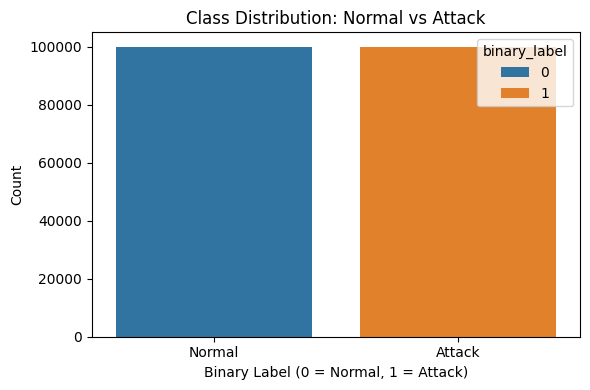

In [50]:
# Plot class distribution as bar chart
plt.figure(figsize=(6, 4))
sns.countplot(data=df_200k_50_50, x='binary_label', hue='binary_label')
plt.title("Class Distribution: Normal vs Attack")
plt.xlabel("Binary Label (0 = Normal, 1 = Attack)")
plt.ylabel("Count")
plt.xticks([0, 1], labels=["Normal", "Attack"])
plt.tight_layout()
plt.savefig("Class_Distribution_BarChart_50_50.png", dpi=300)
plt.show()

In [55]:
import os

file_path = "/content/veremi_binary_200k.csv"

# Get file size in bytes
file_size_bytes = os.path.getsize(file_path)

# Convert to MB
file_size_mb = file_size_bytes / (1024 * 1024)

print(f"File size of '{file_path}': {file_size_mb:.2f} MB")


File size of '/content/veremi_binary_200k.csv': 45.20 MB


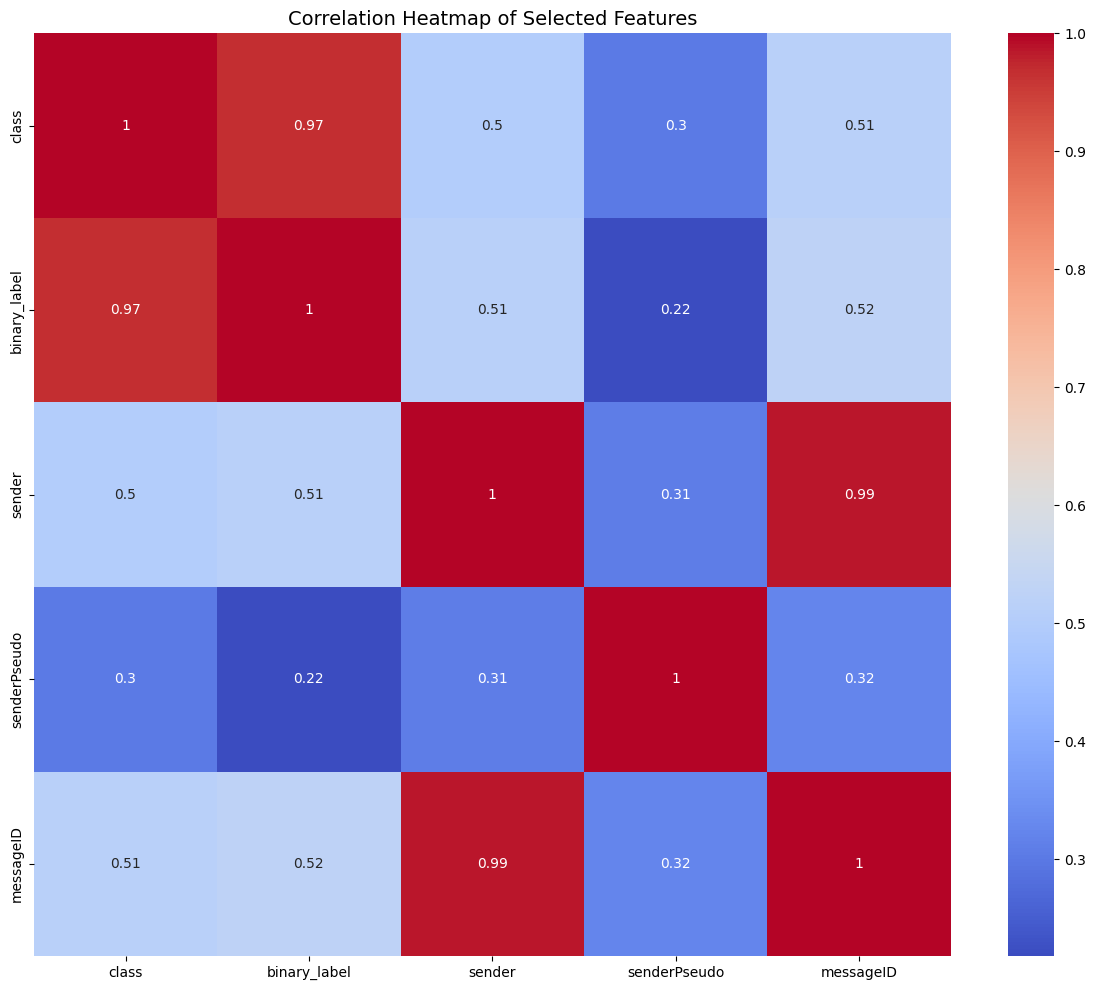

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Select only relevant columns for correlation
features_to_correlate = df_200k_50_50[['class', 'binary_label', 'sender', 'senderPseudo', 'messageID']]

# Optional: encode Attack and Attack_type if they are object type (strings)
# features_to_correlate['Attack'] = features_to_correlate['Attack'].astype('category').cat.codes
# features_to_correlate['Attack_type'] = features_to_correlate['Attack_type'].astype('category').cat.codes

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(features_to_correlate.corr(numeric_only=True), cmap='coolwarm', annot=True)
plt.title("Correlation Heatmap of Selected Features", fontsize=14)
plt.tight_layout()
plt.savefig("correlation_heatmap.png", dpi=300)
plt.show()


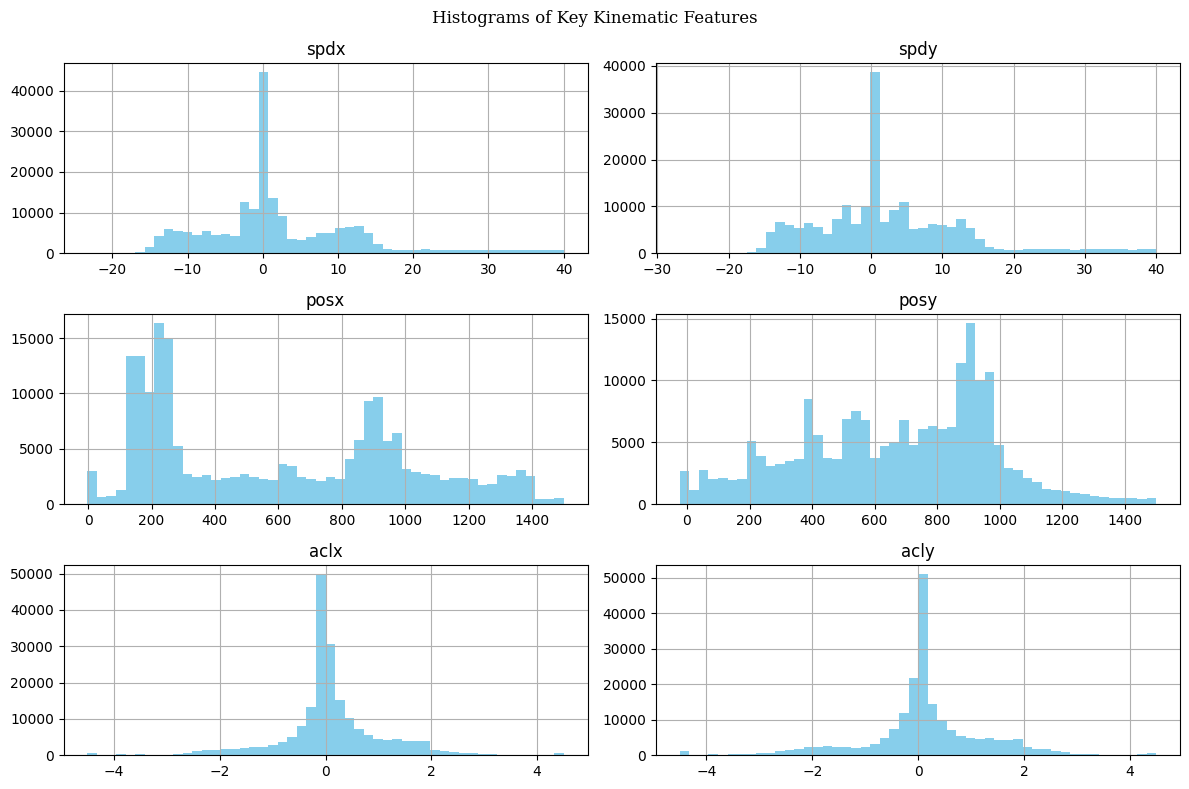

In [58]:
# Histograms (with save)
key_features = ['spdx', 'spdy', 'posx', 'posy', 'aclx', 'acly']
df_200k_50_50[key_features].hist(figsize=(12, 8), bins=50, color='skyblue')
plt.suptitle("Histograms of Key Kinematic Features", fontname='serif')
plt.tight_layout()
plt.savefig("feature_histograms.png", dpi=300)
plt.show()

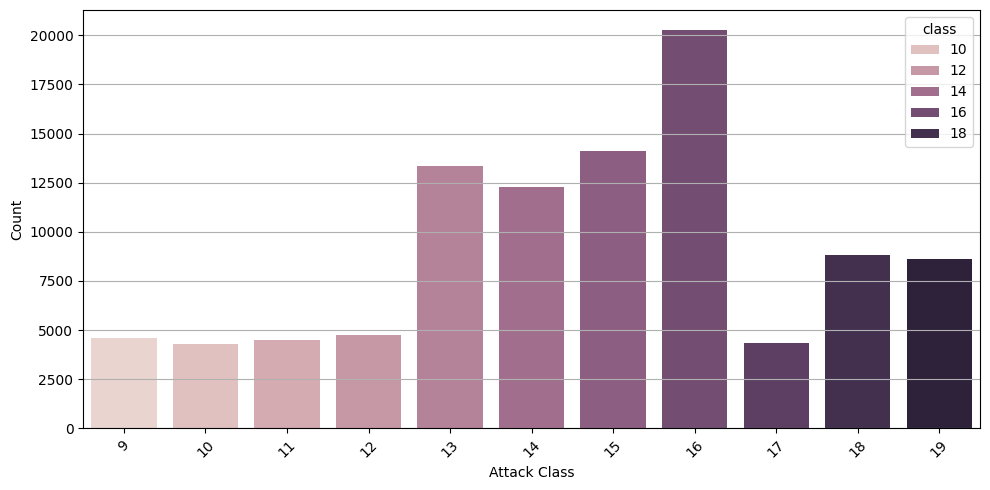

In [60]:
# Attack class distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=df_200k_50_50[df_200k_50_50['binary_label'] == 1],
              x='class', hue='class')
#plt.title('Attack Class Distribution (within Attacks)', fontsize=12)
plt.xlabel('Attack Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig("attack_class_distribution.png", dpi=300)
plt.show()

In [66]:
import pandas as pd
file_path = "/content/veremi_binary_200k.csv"
# Load full balanced dataset
df_full = pd.read_csv(file_path)

# Ensure it's sorted by sendTime or frame_id
df_full = df_full.sort_values(by='sendTime').reset_index(drop=True)

# Separate classes
df_normal = df_full[df_full['binary_label'] == 0].copy()
df_attack = df_full[df_full['binary_label'] == 1].copy()

# Define subset sizes
subset_sizes = [20000, 40000, 80000, 120000, 160000, 200000]

# Initialize tracking DataFrame
subset_class_summary = pd.DataFrame()

for size in subset_sizes:
    half = size // 2

    # Take first N/2 from each class (sequentially)
    subset_normal = df_normal.iloc[:half]
    subset_attack = df_attack.iloc[:half]

    # Combine and sort by sendTime
    subset = pd.concat([subset_normal, subset_attack])
    subset = subset.sort_values(by='sendTime').reset_index(drop=True)
    subset['frame_id'] = range(len(subset))  # Reassign frame_id

    # Save
    filename = f"veremi_subset_{size}.csv"
    subset.to_csv(filename, index=False)
    print(subset['binary_label'].value_counts())
    print(len(subset),  "samples")
    print(f"Saved {filename}")
    print("---------------------")

        # ---- Plot distributions ----
    binary_counts = subset['binary_label'].value_counts(normalize=True) * 100
    class_counts = subset['class'].value_counts(normalize=True).sort_index() * 100

    '''
    # Plot as a standalone bar chart
    plt.figure(figsize=(10, 5))
    plt.bar(class_counts_sorted.index.astype(str), class_counts_sorted.values, color='#8da0cb')
    plt.title(f"Attack Class Distribution (%) - {len(subset)} Samples")
    plt.xlabel('Attack Class')
    plt.ylabel('Percentage')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.savefig("attack_class_distribution_percent.png", dpi=300)
    plt.show()
    plt.tight_layout()
    '''
    # ---- Track class distribution for summary ----
    class_row = class_counts.copy()
    class_row['subset_size'] = size
    subset_class_summary = pd.concat([subset_class_summary, class_row.to_frame().T], ignore_index=True)

# ---- Final formatting ----
subset_class_summary = subset_class_summary.set_index('subset_size')
subset_class_summary.index.name = 'Sample Size'
subset_class_summary = subset_class_summary[sorted(subset_class_summary.columns, key=lambda x: int(x))]
subset_class_summary = subset_class_summary.fillna(0)
subset_class_summary.head(10)

binary_label
0    10000
1    10000
Name: count, dtype: int64
20000 samples
Saved veremi_subset_20000.csv
---------------------
binary_label
0    20000
1    20000
Name: count, dtype: int64
40000 samples
Saved veremi_subset_40000.csv
---------------------
binary_label
0    40000
1    40000
Name: count, dtype: int64
80000 samples
Saved veremi_subset_80000.csv
---------------------
binary_label
0    60000
1    60000
Name: count, dtype: int64
120000 samples
Saved veremi_subset_120000.csv
---------------------
binary_label
0    80000
1    80000
Name: count, dtype: int64
160000 samples
Saved veremi_subset_160000.csv
---------------------
binary_label
0    100000
1    100000
Name: count, dtype: int64
200000 samples
Saved veremi_subset_200000.csv
---------------------


class,0,9,10,11,12,13,14,15,16,17,18,19
Sample Size,,,,,,,,,,,,
20000.0,50.0,2.955000,2.6900,2.670000,2.420000,7.315000,4.050000,7.470000,9.300000,1.445000,4.88000,4.805000
40000.0,50.0,2.657500,2.3325,2.555000,2.697500,7.825000,4.040000,7.930000,8.892500,1.442500,5.15000,4.477500
80000.0,50.0,2.406250,2.5375,2.383750,2.620000,6.888750,5.796250,6.921250,9.158750,1.847500,4.96375,4.476250
120000.0,50.0,2.295000,2.1675,2.286667,2.635833,7.010000,5.353333,6.601667,10.180833,2.122500,4.85750,4.489167
160000.0,50.0,2.320625,2.1950,2.195000,2.435000,7.084375,6.184375,6.613125,9.938125,2.098125,4.53750,4.398750
200000.0,50.0,2.302500,2.1415,2.249000,2.385000,6.678500,6.152500,7.068500,10.137500,2.162000,4.41750,4.305500


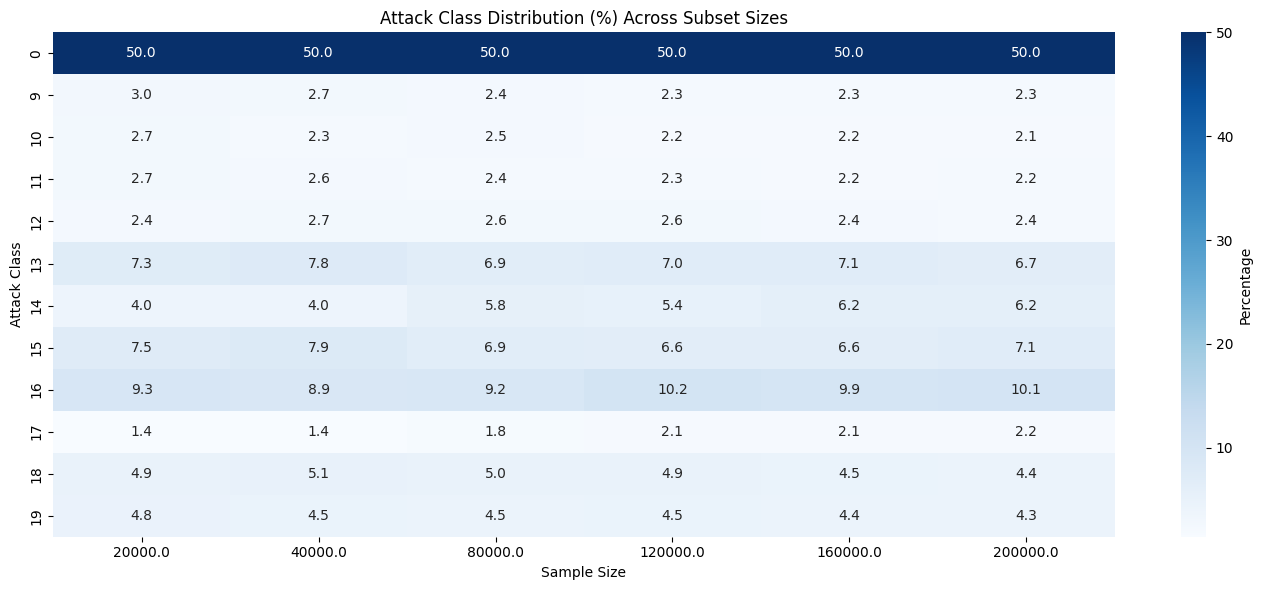

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.heatmap(subset_class_summary.T, annot=True, fmt=".1f", cmap="Blues", cbar_kws={'label': 'Percentage'})

plt.title("Attack Class Distribution (%) Across Subset Sizes")
plt.xlabel("Sample Size")
plt.ylabel("Attack Class")
plt.tight_layout()
plt.show()


In [68]:
import plotly.graph_objects as go
import pandas as pd
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Melt DataFrame to long format
df_long = subset_class_summary.reset_index().melt(id_vars='Sample Size', var_name='Attack Class', value_name='Percentage')
df_long['Attack Class'] = df_long['Attack Class'].astype(str)

# Generate distinct colors for each class using a colormap
unique_classes = sorted(df_long['Attack Class'].unique(), key=lambda x: int(x))
color_map = cm.get_cmap('tab20', len(unique_classes))
class_colors = {cls: mcolors.to_hex(color_map(i)) for i, cls in enumerate(unique_classes)}

# Create 3D lines for each (Sample Size, Attack Class)
fig = go.Figure()

for _, row in df_long.iterrows():
    x = row['Sample Size']
    y = row['Attack Class']
    z = row['Percentage']
    color = class_colors[y]

    fig.add_trace(go.Scatter3d(
        x=[x, x],
        y=[y, y],
        z=[0, z],
        mode='lines',
        line=dict(color=color, width=10),
        name=f'Class {y}',
        showlegend=False,
        hovertemplate=f"Sample Size: {x}<br>Attack Class: {y}<br>Percentage: {z:.2f}%<extra></extra>"
    ))

# Add legend entries manually (one per class)
for cls, color in class_colors.items():
    fig.add_trace(go.Scatter3d(
        x=[None], y=[None], z=[None],
        mode='lines',
        line=dict(color=color, width=10),
        name=f'Class {cls}',
        showlegend=True
    ))

# Layout
fig.update_layout(
    title="3D Class-Wise Distribution Across Sample Sizes",
    scene=dict(
        xaxis_title='Sample Size',
        yaxis_title='Attack Class',
        zaxis_title='Percentage',
    ),
    margin=dict(l=0, r=0, t=50, b=0)
)

fig.show()


<ipython-input-68-981602176>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = cm.get_cmap('tab20', len(unique_classes))


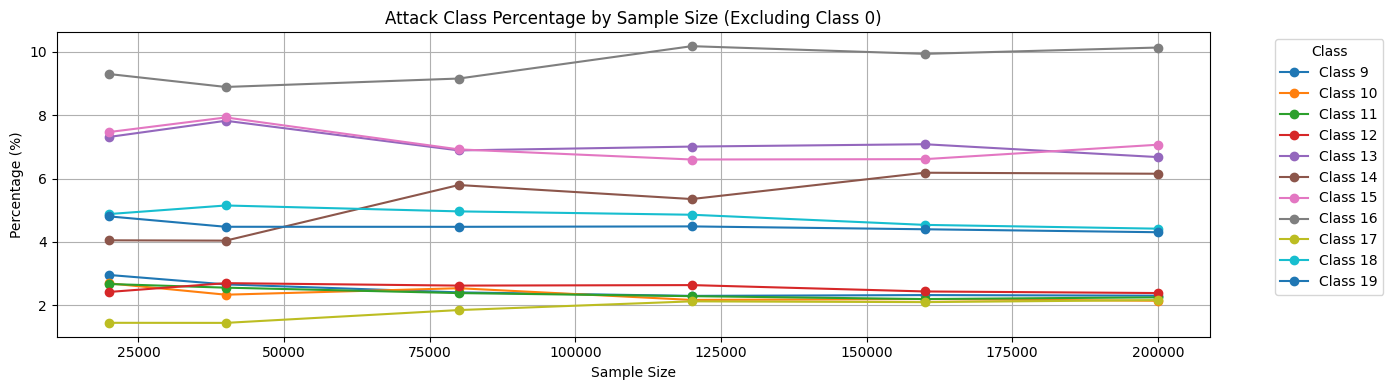

In [72]:
# Drop class 0
subset_no_class_0 = subset_class_summary.drop(columns=[0])

# Plot each remaining class
plt.figure(figsize=(14, 4))

for col in subset_no_class_0.columns:
    plt.plot(subset_no_class_0.index, subset_no_class_0[col], marker='o', label=f'Class {col}')

plt.title("Attack Class Percentage by Sample Size (Excluding Class 0)")
plt.xlabel("Sample Size")
plt.ylabel("Percentage (%)")
plt.grid(True)
plt.legend(title="Class", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("attack_class_percentage_excl_class_0.png", dpi=300)
plt.show()

In [73]:
# Drop 'Sample Size' if it's still a column (it should already be the index)
if 'Sample Size' in subset_class_summary.columns:
    subset_class_summary = subset_class_summary.set_index('Sample Size')

# Compute variance for each class column
variance_per_class = subset_class_summary.var()

# Sort by highest variance (optional)
variance_sorted = variance_per_class.sort_values(ascending=False)

# Display
print("Variance of Class Percentages Across Sample Sizes:")
print(variance_sorted)


📊 Variance of Class Percentages Across Sample Sizes:
class
14    0.979951
16    0.305170
15    0.268825
13    0.159142
17    0.112640
18    0.074845
9     0.070633
10    0.050330
11    0.034850
19    0.028383
12    0.017895
0     0.000000
dtype: float64


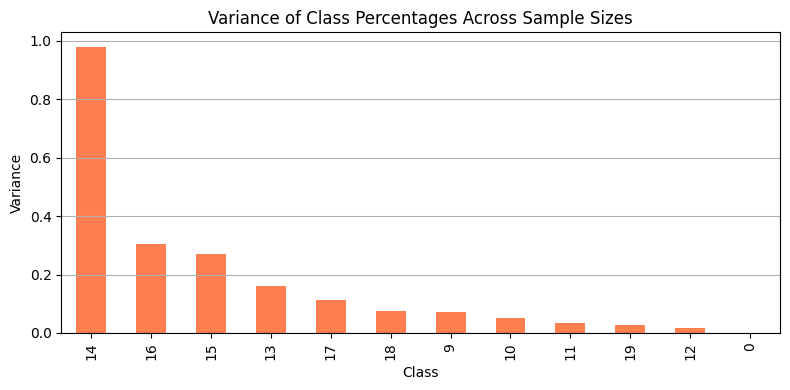

In [78]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert to pandas Series and sort
variance_series = pd.Series(variance_sorted).sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 4))
variance_series.plot(kind='bar', color='coral')
plt.title("Variance of Class Percentages Across Sample Sizes")
plt.ylabel("Variance")
plt.xlabel("Class")
plt.grid(axis='y')
plt.tight_layout()
plt.savefig("class_percentage_variance.png", dpi=300)
plt.show()


In [79]:
import json

metadata = {
    "title": "Veremi Ext. Attack Balanced Subsets 20K to 200K",
    "id": "shilpasayura/veremi-ex-subsets",
    "licenses": [{"name": "CC0-1.0"}]
}

with open("dataset-metadata.json", "w") as f:
    json.dump(metadata, f, indent=4)


In [82]:
dataset_dir = "/content/veremi-ex-subsets"
os.makedirs(dataset_dir, exist_ok=True)

In [83]:
import shutil

# List of subset CSVs
subset_files = [
    "veremi_subset_20000.csv",
    "veremi_subset_40000.csv",
    "veremi_subset_80000.csv",
    "veremi_subset_120000.csv",
    "veremi_subset_160000.csv",
    "veremi_subset_200000.csv",
    "dataset-metadata.json"
]

# Move them into the dataset folder
for file in subset_files:
    shutil.move(f"/content/{file}", f"{dataset_dir}/{file}")


In [84]:
!kaggle datasets create -p veremi-ex-subsets/

Starting upload for file veremi_subset_120000.csv
100% 27.0M/27.0M [00:00<00:00, 46.9MB/s]
Upload successful: veremi_subset_120000.csv (27MB)
Starting upload for file veremi_subset_80000.csv
100% 17.9M/17.9M [00:00<00:00, 44.4MB/s]
Upload successful: veremi_subset_80000.csv (18MB)
Starting upload for file veremi_subset_40000.csv
100% 8.91M/8.91M [00:00<00:00, 27.1MB/s]
Upload successful: veremi_subset_40000.csv (9MB)
Starting upload for file veremi_subset_160000.csv
100% 36.1M/36.1M [00:00<00:00, 68.6MB/s]
Upload successful: veremi_subset_160000.csv (36MB)
Starting upload for file veremi_subset_20000.csv
100% 4.43M/4.43M [00:00<00:00, 15.5MB/s]
Upload successful: veremi_subset_20000.csv (4MB)
Starting upload for file veremi_subset_200000.csv
100% 45.2M/45.2M [00:00<00:00, 54.5MB/s]
Upload successful: veremi_subset_200000.csv (45MB)
Your private Dataset is being created. Please check progress at https://www.kaggle.com/datasets/shilpasayura/veremi-ex-subsets


In [85]:
from datetime import datetime

# Get current date and time
current_datetime = datetime.now()
print(current_datetime)

2025-06-18 13:38:22.900704
